# Section 1.2: Naive Bayes

In contrast to *k*-means clustering, Naive Bayes is a supervised machine-learning (ML) algorithm. It provides good speed and good accuracy and is often used in aspects of natural-language processing such text classification or, in our case in this section, spam detection.

Spam emails are more than just a nuisance. As recently as 2008, spam constituted an apocalyptic 97.8 percent of all email traffic according to a [2009 Microsoft security report](http://download.microsoft.com/download/4/3/8/438BE24D-4D58-4D9A-900A-A1FC58220813/Microsoft_Security_Intelligence_Report _volume8_July-Dec2009_English.pdf). That tide has thankfully turned and, as of May 2019, spam makes up only about [85 percent of email traffic](https://www.talosintelligence.com/reputation_center/email_rep) — thanks, in no small part, to Naive Bayes spam filters.

Naive Bayes is a convenient algorithm for spam detection because it does not require encoding complex rules. All it needs is training examples, of which there are plenty when it comes to email spam. Naive Bayes does all this through the use of [conditional probability](https://en.wikipedia.org/wiki/Conditional_probability).

> **Learning objective:** By the end of this section, you should have a basic understanding of how naive Bayes works and some of the reasons for its popularity.

## Conditional probability

Ordinary probability deals with the likelihood of isolated events occurring. For example, rolling a 6 on a fair six-sided die will occur, on average, on one out of six rolls. Mathematicians express this probability as $P({\rm die}=6)=\frac{1}{6}$.

Conditional probability concerns itself with the contingencies of interconnected events: what is the probability of event $A$ happening if event $B$ occurs. Mathematicians denote this as $P(A|B)$, or "the probability of $A$ given $B$."

In order to compute the probability of conditional events, we use the following equation:

$P(A \mid B)=\cfrac{P(A \cap B)}{P(B)}$

This equation is nice, but it assumes that we know the joint probability $P(A\cap B)$, which we often don't. Instead, we often need to know something about $A$ but all we can directly observe is $B$. For instance, when we want to infer whether an email is spam only by knowing the words it contains. For this, we need Bayes' law.

## Bayes' law

Bayes' law takes its name from the eighteenth-century English statistician and philosopher Thomas Bayes, who described the probability of an event based solely on prior knowledge of conditions that might be related to that event thus:

$P(A \mid B)=\cfrac{P(B \mid A)P(A)}{P(B)}$

In words, Bayes' Law says that if I know the prior probabilities $P(A)$ and $P(B)$, in addition to the likelihood (even just an assumed likelihood) $P(B \mid A)$, I can compute the posterior probability $P(A \mid B)$. Let's apply this to spam.

<img align="center" style="padding-right:10px;" src="Images/spam.png" border="5">

In order to use Bayesian probability on spam email messages like this one, consider it (and all other emails, spam or ham) to be bags of words. We don't care about word order or even word meaning. We just want to count the frequency of certain words in spam messages versus the frequency of those same words in valid email messages.

Let's say that, after having counted the words in hundreds of emails that we have received, we determine the probability of the word "debt" appearing in any kind of email message (spam or ham) to be 0.157, with the probability of "debt" appearing in spam messages being 0.309. Further more, let's say that we assume that there is a 50 percent chance that any given email message we receive is spam (for this example, we don't know either way what type of email it might be, so it's a coin flip). Mathematically, we could thus say:
 - Probability that a given message is spam: $P({\rm S})=0.5$
 - Probability that “debt” appears in a given message: $P({\rm debt})=0.157$
 - Probability that “debt” appears in a spam message: $P({\rm debt} \mid {\rm S})=0.309$

Plugging this in to Bayes' law, we get the following probability that an email message containing the word "debt" is spam:

$P({\rm S} \mid {\rm debt})=\cfrac{P({\rm debt} \mid {\rm S})P({\rm S})}{P({\rm debt})}=\cfrac{(0.309)(0.5)}{0.157}=\cfrac{0.1545}{0.157}=0.984$

Thus if an email contains the word "debt," we calculate that it is 98.4 percent likely to be spam.

## What makes it naive?

Our above calculation is great for looking at individual words, but emails contain several words that can give us clues to an email's relative likelihood of being spam or ham. For example, say we wanted to determine whether an email is spam given that it contains the words "debt" and "bills." We can begin by reasoning that the probability that an email containing "debt" and "bills" is spam is, if not equal, at least proportional to the probability of "debt" and "bills" appearing in known spam messages times the probability of any given message being spam:

$P({\rm S} \mid {\rm debt, bills}) \propto P({\rm debt, bills} \mid {\rm S})P({\rm S})$

(**Mathematical note:** The symbol ∝ represents proportionality rather than equality.)

Now if we assume that the occurrence of the words "debt" and "bills" are independent events, we can extend this proportionality:

$P({\rm S} \mid {\rm debt, bills}) \propto P({\rm debt} \mid {\rm S})P({\rm bills} \mid {\rm S})P({\rm S})$

We should state here that this assumption of independence is generally not true. Just look at the example spam message above. The probability that "bills" will appears in a spam message containing "debt" is probably quite high. However, assuming that the probabilities of words occurring in our email messages are independent is useful and works surprising well. This assumption of independence is the naive part of the Baysian probabilities that we will use in this section; expressed mathematically, the working assumption that will underpin the ML in this section is that for any collection of $n$ words:

$P({\rm S}\mid {\rm word_1}, {\rm word_2},\ldots, {\rm word}_n)=P({\rm S})P({\rm word_1}\mid {\rm S})P({\rm word_2}\mid {\rm S})\cdots P({\rm word}_n\mid {\rm S})$

> **Key takeaway:** We cannot emphasize enough that this chain rule expressed in the equation above—that the probability of a message being spam based on the words in it is equal to the product of the likelihoods of those individual words appearing in messages known to be spam is ***not*** true. But it gets good results and, in the world of data science, fast and good enough always trump mathematical fidelity.

## Import the dataset

In this section, we'll use the [SMS Spam Collection dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection). It contains 5,574 messages collected for SMS spam research and tagged as "spam" or "ham." The dataset files contain one message per line with each line being composed of the tag and the raw text of the SMS message. For example:

| Class | Message                       |
|:------|:------------------------------|
| ham   | What you doing?how are you?   |
| ham   | Ok lar... Joking wif u oni... |

Let’s now import pandas and load the dataset. (Note that the path name is case sensitive.)

In [10]:
import pandas as pd 
df = pd.read_csv('Data/SMSSpamCollection', sep='\t', names=['Class', 'Message'])

> **Question**
>
> What do the `sep` and `names` parameters do in the code cell above? (**Hint:** If you are unsure, you can refer to the built-in Help documentation using `pd.read_csv?` in the code cell below.)

Let's take an initial look at what's in the dataset.

In [11]:
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


Note that several entries in the `Message` column are truncated. We can use the `set_option()` function to set pandas to display the maximum width of each entry. 

In [12]:
pd.set_option('display.max_colwidth', -1)
df.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


> **Question**
>
> What do you think the purpose of the `-1` parameter passed to `pd.set_option()` is in the code cell above?  

Alternatively, we can dig into individual messages.

In [13]:
df['Message'][13]

"I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times."

## Explore the data

Now that we have an idea of some of the individual entries in the dataset, let's get a better sense of the dataset as a whole.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
Class      5572 non-null object
Message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


> **Exercise**
>
> Now run the `describe()` method on `df`. Does it provide much useful information about this dataset? If not, why not?

> **Possible exercise solution**

In [15]:
df.describe()

,Class,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


We can also visualize the dataset to graphically see the mix of spam to ham. (Note that we need to include the `%matplotlib inline` magic command in order to actually see the bar chart here in the notebook.)

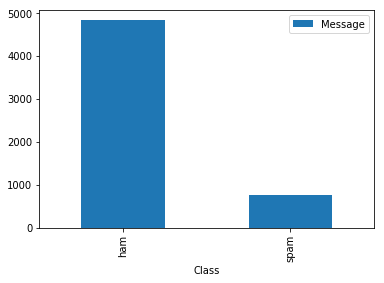

In [16]:
%matplotlib inline
df.groupby('Class').count().plot(kind='bar')

> **Key takeaway:** Notice that here an in previous sections we have stuck together several methods to run on a `DataFrame`. This kind of additive method-stacking is part of what makes Python and pandas such a power combination for the rough-and-ready data exploration that is a crucial part of data science.

## Explore the data using word clouds

Because our data is largely not numeric, you might have noticed that some of our go-to data exploration tools (such as bar charts and the `describe()` method) have been of limited use in exploring this data. Instead, word clouds can be a powerful way of getting a quick glance at what's represented in text data as a whole.

In [17]:
!pip install wordcloud

     |████████████████████████████████| 358kB 2.9MB/s eta 0:00:01


We will have to supply a number of parameters to the `WordCloud()` function and to matplotlib in order to render the word clouds, so we will save ourselves some redundant work by writing a short function to handle it. Parameters for `WordCloud()` will include the stop words we want to ignore and font size for the words in the cloud. For matplotlib, these parameters will include instructions for rendering the word cloud.

In [18]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def get_wordcloud(text_data,title):
  wordcloud = WordCloud(background_color='black',
                        stopwords=set(STOPWORDS),
                        max_font_size=40, 
                        relative_scaling=1.0,
                        random_state=1
  ).generate(str(text_data))

  fig = plt.figure(1, figsize=(12, 12))
  plt.axis('off')
  plt.title(title)
  plt.imshow(wordcloud)
  plt.show()

Now it is time to plot the word clouds.

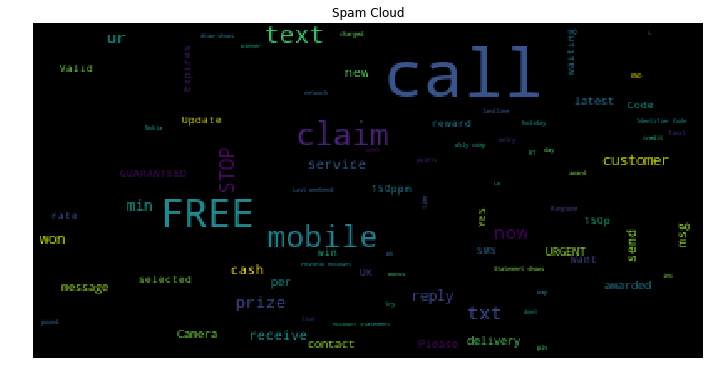

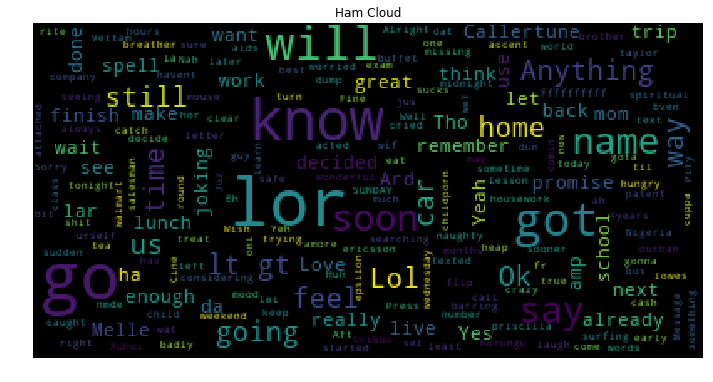

In [19]:
spam_msg = df.loc[df['Class']=='spam']['Message']
get_wordcloud(spam_msg,'Spam Cloud')
ham_msg = df.loc[df['Class']=='ham']['Message']
get_wordcloud(ham_msg,'Ham Cloud')

Looking at the two word clouds, it is immediately apparent that the frequency of the most common words is different between our spam and our ham messages, which will form the primary basis of our spam detection.

## Explore the data numerically

Just because the data does not naturally lend itself to numerical analysis "out of the box" does not mean that we can't do so. We can also analyze the average length of spam and ham messages to see if there are differences. For this, we need to create a new column. 

In [20]:
df['Length_of_msg'] = df['Message'].apply(len)
df.head()

,Class,Message,Length_of_msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


> **Question**
>
> What does the `apply()` method do in the code cell above? (**Hint:** If you are unsure, you can refer to [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).)

Now that we have the length of each message, we can visualize those message lengths using a histogram.

Class
ham     AxesSubplot(0.125,0.125;0.775x0.755)
spam    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Length_of_msg, dtype: object

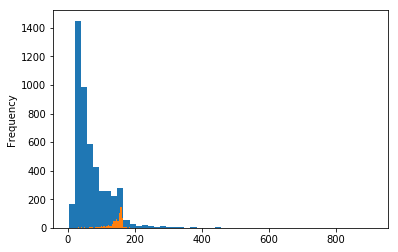

In [21]:
df.groupby('Class')['Length_of_msg'].plot(kind='hist', bins=50)

The orange histogram is the spam messages. Because there are so many more ham messages than spam, let's break these out separately to see the details more clearly.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd96270b198>,
      dtype=object)

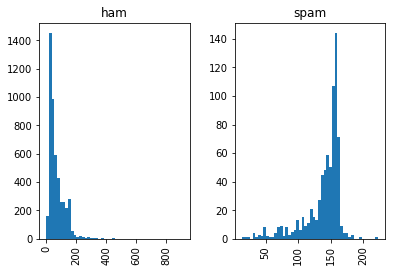

In [22]:
df.hist(bins=50,by='Class', column='Length_of_msg')

Spam messages skew much longer than ham messages.

> **Question**
>
> Why does it appear in the details histograms that there is almost no overlap between the lengths of ham and spam text messages? What do the differences in scale tell us (and what could they inadvertently obscure)?

Let's look at the differences in length of the two classes of message numerically.

In [23]:
df.groupby('Class').mean()

,Length_of_msg
Class,
ham,71.482487
spam,138.670683


These numbers accord with what we saw in the histograms.

Now, let's get to the actual modeling and spam detection.

## Prepare the data for modeling

One of the great strengths of naive Bayes analysis is that we don't have to go too deep into text processing in order to develop robust spam detection. However, the text is raw and it does require a certain amount of cleaning. To do this, we will use one of the most commonly used text-analytics libraries in Python, the Natural Language Toolkit (NLTK). However, before we can import it, we will need to first install it. 

In [24]:
!pip install nltk

We can now import NLTK, in addition to the native Python string library to help with our text manipulation. We will also download the latest list of stop words (such as 'the', 'is', and 'are') for NLTK.

In [25]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Part of our data preparation will be *vectorizing* the text data. Recall that earlier in the section when we first introduced naive Bayes analysis, we stated that we wanted to treat our messages as "bags of words" rather than as English-language messages. Vectorization is the process by which we convert our collection of text messages to a matrix of word counts.

Part of the vectorization process will be for us to remove punctuation from the messages and exclude stop words from our analysis. We will write a function to perform those tasks here, because we will want to access those actions later on.

In [26]:
def txt_preprocess(text):
   
    #Remove punctuation 
    temp = [w for w in text if w not in string.punctuation]
    temp = ''.join(temp)
    
    #Exclude stopwords
    processedtext = [w for w in temp.split() if w.lower() not in stopwords.words('english')]
    return processedtext

Scikit-learn provides a count-vectorizer function. We will now import it and then use the `txt_preprocess()` function we just wrote as a custom analyzer for it.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

X = df['Message']
y = df['Class']

CountVect = CountVectorizer(analyzer=txt_preprocess).fit(X)

> **Technical note:** The convention of using an upper-case `X` to represent the independent variables (the predictors) and a lower-case `y` to represent the dependent variable (the response) comes from statistics and is commonly used by data scientists.

In order to see how the vectorizer transformed the words, let's check it against a common English word like "go."

In [28]:
print(CountVect.vocabulary_.get('go'))

6864


So "go" appears 6,864 times in our dataset.

Now, before we transform the entire dataset and train the model, we have the final preparatory step of splitting our data into training and test data to perform.

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=50)

Finally, we will transform our training messages into a [document-term matrix](https://en.wikipedia.org/wiki/Document-term_matrix). "Document" might sound a little grandiose in this case as it refers to individual text messages, but it is a term of art for text analysis.

In [30]:
X_train_data = CountVect.transform(X_train)

This can be a tricky concept, so let's look at the training-text matrix directly.

In [31]:
print(X_train_data)

  (0, 7173)	1
  (0, 9613)	1
  (0, 10093)	1
  (0, 11051)	1
  (1, 16)	1
  (1, 273)	1
  (1, 370)	1
  (1, 526)	1
  (1, 685)	1
  (1, 1341)	1
  (1, 3350)	1
  (1, 3851)	1
  (1, 4098)	1
  (1, 4828)	1
  (1, 4881)	1
  (1, 5286)	1
  (1, 5683)	1
  (1, 8064)	1
  (1, 8218)	1
  (1, 11369)	1
  (2, 2648)	1
  (2, 5881)	1
  (2, 7395)	1
  (2, 7838)	1
  (2, 8000)	1
  :	:
  (3896, 4254)	1
  (3896, 7944)	1
  (3896, 8009)	1
  (3896, 8241)	1
  (3896, 9549)	1
  (3897, 1634)	1
  (3897, 4005)	1
  (3897, 4491)	1
  (3897, 5275)	1
  (3898, 61)	1
  (3898, 1353)	1
  (3898, 1417)	1
  (3898, 1867)	1
  (3898, 2088)	1
  (3898, 2971)	1
  (3898, 3746)	1
  (3898, 5519)	1
  (3898, 6838)	1
  (3898, 6969)	1
  (3898, 7839)	1
  (3898, 8607)	1
  (3898, 11363)	1
  (3898, 11384)	1
  (3899, 1445)	1
  (3899, 6079)	1


In [32]:
X_train_data.shape

(3900, 11425)

`X_train_data` is now a 3900x11425 matrix, where each of the 3,900 rows represents a text ("document") from the training dataset and each column is a specific word (11,425 of them in this case).

> **Key takeaway:** Putting our bag of words into a document-term matrix like this is a standard tool of natural-language processing and text analysis, and it is used in contexts beyond naive Bayes analysis in which word-frequency is important, such as [term frequency–inverse document frequency (TF-IDF)](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

## Train the model

Now it is time to train our naive Bayes model. For our model, we will use the multinomial naive Bayes classifier. "Multinomial" in this case derives from our assumption that, for our bag of $n$ words, $P({\rm S}\mid {\rm word_1}, {\rm word_2},\ldots, {\rm word}_n)=P({\rm S})P({\rm word_1}\mid {\rm S})P({\rm word_2}\mid {\rm S})\cdots P({\rm word}_n\mid {\rm S})$ and that we don't assume that our word likelihoods follow a normal distribution.

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
naivebayes_model = MultinomialNB()
naivebayes_model.fit(X_train_data,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

Our model is now fitted. However, before we run our predictions on all of our test data, let's see what our model says about some artificial data in order to get a better sense of what our model will do with all of the messages in our test dat. From the word clouds we constructed earlier, we can see that "call" and "free" are both prominent words among our spam messages, so let's create our own spam message and see how our model classifies it.

In [54]:
pred = naivebayes_model.predict(CountVect.transform(['Get 50% off your next purchase. Call now']))
pred

array(['spam'], dtype='<U4')

As we expected, our model correctly classified this message as spam. 

> **Exercise**
>
> Review the ham word cloud above, construct a ham message, and then run it against the model to see how it is classified.

> **Possible exercise solution**

In [36]:
pred2 = naivebayes_model.predict(CountVect.transform(['Let me know what time we should go.']))
pred2

array(['ham'], dtype='<U4')

Now let's run our test data through the model. First, we need to transform it to a document-term matrix.

In [37]:
X_test_data = CountVect.transform(X_test)
X_test_data.shape

(1672, 11425)

> **Exercise**
>
> Run the predictions for the test data.

> **Exercise solution**

In [38]:
predictions = naivebayes_model.predict(X_test_data)
predictions

array(['spam', 'ham', 'ham', ..., 'spam', 'ham', 'spam'], dtype='<U4')

Now it's time to evaluate our model's performance.

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

        ham       0.97      0.99      0.98      1430
       spam       0.95      0.79      0.86       242

avg / total       0.96      0.96      0.96      1672



> **Exercise**
>
> Overall, our model is  good for spam detection, but our recall score (the proportion of actual positives that were identified correctly) is surprisingly low. Why might this be? What implications does it have for spam detection? (**Hint:** Use the scikit-learn `confusion_matrix()` function to better understand the specific performance of the model. For help interpreting the confusion matrix, see [this page](https://en.wikipedia.org/wiki/Confusion_matrix).)

> **Possible exercise solution**

In [40]:
print(confusion_matrix(y_test, predictions))

[[1419   50]
 [  11  192]]


> **Takeaway**
>
> The performance of our naive Bayes model helps underscore the algorithm's popularity, particularly for spam detection. Even untuned, we got good performance, performance that would only continue to improve in production as users submitted more examples of spam messages.

## Further exploration

Beyond detecting spam, we can use ML to explore the SMS data more deeply. To do so, we can use sophisticated, cloud-based cognitive tools such as Microsoft Azure Cognitive Services.

### Azure Cognitive Services

The advantage of using cloud-based services is that they provide cutting-edge models that you can access without having to train the models. This can help accelerate both your exploration and your use of ML.

Azure provides Cognitive Services APIs that can be consumed using Python to conduct image recognition, speech recognition, and text recognition, just to name a few. For the purposes of this subsection, we're going to look at using the Azure Text Analytics API.

First, we’ll start by obtaining a Cognitive Services API key. Note that you can get a free key for seven days (after which you'll be required to pay for continued access to the API).

To learn more about pricing for Cognitive Services, see https://azure.microsoft.com/pricing/details/cognitive-services/

Browse to **Try Azure Cognitive Services** at https://azure.microsoft.com/try/cognitive-services/

1. Click **Language APIs**.
2. By **Text Analytics**, click **Get API key**.
3. In the **Try Cognitive Services for free** window, under **7-day trial**, click **Get stared**.
4. In the **Microsoft Cognitive Services Terms** window, accept the terms of the free trial and click **Next**.
5. In the **Sign-in to Continue** window, select your preferred means of signing in to your Azure account.

Once you have your API keys in hand, you're ready to start. Substitute the API key that you get for the seven-day trial below where it reads `ACCOUNT_KEY`.

In [41]:
# subscription_key = 'ACCOUNT_KEY'
subscription_key = ''
assert subscription_key

# If using a Free Trial account, this URL does not need to be updated.
# If using a paid account, verify that it matches the region where the 
# Text Analytics Service was setup.
text_analytics_base_url = "https://westcentralus.api.cognitive.microsoft.com/text/analytics/v2.1/"

We will also need to import the NumPy and requests modules.

In [42]:
import numpy as np
import requests

The Azure Text Analytics API has a hard limit of 1,000 calls at a time, so we will need to split our 5,572 SMS messages into at least six chunks to run them through Azure.

In [43]:
chunks = np.array_split(df, 6)

for chunk in chunks:
    print(len(chunk))

929
929
929
929
928
928


Two of the things that cognitives services like those provided by Azure offer are language identification and sentiment analysis. Both are relevant for our dataset, so we will prepare our data for both by submitting them as JavaScript Object Notation (JSON) documents. We'll prepare the data for language identification first.

In [44]:
# Prepare the header for the JSON document including your subscription key
headers   = {"Ocp-Apim-Subscription-Key": subscription_key}

# Supply the URL for the language-identification API.
language_api_url = text_analytics_base_url + "languages"

# Iterate over the chunked DataFrame.
for i in range(len(chunks)):
    
    # Reset the indexes within the chunks to avoid problems later on.
    chunks[i] = chunks[i].reset_index()
    
    # Split up the message from the DataFrame and put them in JSON format.
    documents = {'documents': []}
    for j in range(len(chunks[i]['Message'])):
        documents['documents'].append({'id': str(j), 'text': chunks[i]['Message'][j]})
    
    # Call the API and capture the responses.
    response  = requests.post(language_api_url, headers=headers, json=documents)
    languages = response.json()
    
    # Put the identified languages in a list.
    lang_list = []
    for document in languages['documents']:
        lang_list.append(document['detectedLanguages'][0]['name'])
    
    # Put the list of identified languages in a new column of the chunked DataFrame.
    chunks[i]['Language'] = np.array(lang_list)

Now we need perform similar preparation of the data for sentiment analysis.

In [45]:
# Supply the URL for the sentiment-analysis API.
sentiment_api_url = text_analytics_base_url + "sentiment"

# Iterate over the chunked DataFrame.
for i in range(len(chunks)):
    
    # We have alread reset the chunk-indexes, so we don't need to do again.
    # Split up the messages from the DataFrame and put them in JSON format.
    documents = {'documents': []}
    for j in range(len(chunks[i]['Message'])):
        documents['documents'].append({'id': str(j), 'text': chunks[i]['Message'][j]})
    
    # Call the API and capture the responses.
    response  = requests.post(sentiment_api_url, headers=headers, json=documents)
    sentiments = response.json()
    
    # Put the identified sentiments in a list.
    sent_list = []
    for document in sentiments['documents']:
        sent_list.append(document['score'])

    # Put the list of identified sentiments in a new column of the chunked DataFrame.
    chunks[i]['Sentiment'] = np.array(sent_list)

We now need to re-assembled our chunked DataFrame.

In [46]:
azure_df = pd.DataFrame(columns=['Index', 'Class', 'Message', 'Language', 'Sentiment'])

for i in range(len(chunks)):
    azure_df = pd.concat([azure_df, chunks[i]])
    if i == 0:
        azure_df['index'] = chunks[i].index

azure_df.set_index('index', inplace=True)
azure_df.drop(['Index'], axis=1, inplace=True)
azure_df.head()

,Class,Language,Length_of_msg,Message,Sentiment
index,,,,,
0,ham,English,111.0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",0.855910
1,ham,English,29.0,Ok lar... Joking wif u oni...,0.815817
2,spam,English,155.0,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,0.500000
3,ham,English,49.0,U dun say so early hor... U c already then say...,0.692537
4,ham,English,61.0,"Nah I don't think he goes to usf, he lives around here though",0.119618


We can also look at the tail of the `DataFrame` to check that our indexing worked as expected.

In [47]:
azure_df.tail()

,Class,Language,Length_of_msg,Message,Sentiment
index,,,,,
5567,spam,English,160.0,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",0.860303
5568,ham,English,36.0,Will ü b going to esplanade fr home?,0.795742
5569,ham,English,57.0,"Pity, * was in mood for that. So...any other suggestions?",0.193941
5570,ham,English,125.0,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,0.249379
5571,ham,English,26.0,Rofl. Its true to its name,0.974917


Let's now see if all of the SMS messages were in English (and, if not, how many messages of which languages we are looking at).

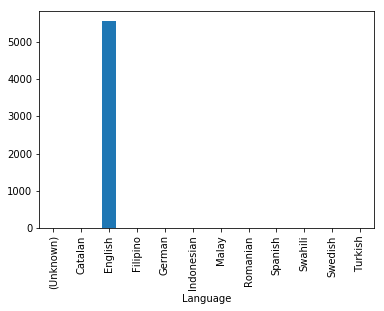

In [48]:
azure_df.groupby('Language')['Message'].count().plot(kind='bar')

So the overwhelming majority of the messages are in English, though we have several additional languages in our dataset. Let's look at the actual numbers.

> **Exercise**
>
> Now use the `groupby` method to display actual counts of the languages detected in the dataset rather than a bar chart of them.

> **Exercise solution**

In [49]:
azure_df.groupby('Language')['Message'].count()

Language
(Unknown)     3   
Catalan       1   
English       5557
Filipino      1   
German        2   
Indonesian    1   
Malay         1   
Romanian      1   
Spanish       2   
Swahili       1   
Swedish       1   
Turkish       1   
Name: Message, dtype: int64

We have a surprising array of languages, perhaps, but the non-English messages are really just outliers and should have no real impact on the spam detection.

Now let's look at the sentiment analysis for our messages.

Class
ham     AxesSubplot(0.125,0.125;0.775x0.755)
spam    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Sentiment, dtype: object

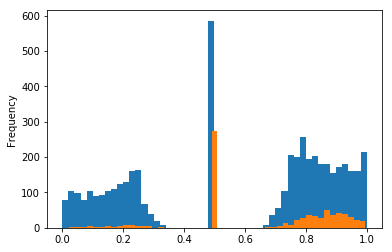

In [50]:
azure_df.groupby('Class')['Sentiment'].plot(kind='hist', bins=50)

It is perhaps not too surprising that the sentiments represented in the dataset should be bifurcated: SMS is a medium that captures extremes better than nuanced middle ground. That said, the number of dead-center messages is interesting. The proportion of spam messages right in the middle is also interesting. Let's break the two classes (ham and spam) into separate histograms to get a better look.

> **Exercise**
>
> Break out the single histogram above into two histograms (one for each class of message). (**Hint:** Refer back to the code we used to do this earlier in the section.)

> **Exercise solution**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd95ed57c18>,
      dtype=object)

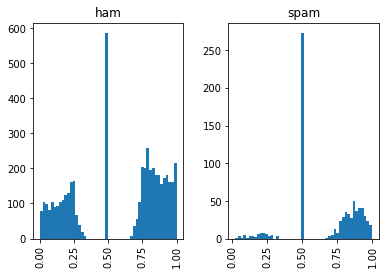

In [51]:
azure_df.hist(bins=50,by='Class', column='Sentiment')

The number of spam messages in our dataset is about a tenth of the amount of ham, yet the number of spam messages with exactly neutral sentiment is about half that of the ham, indicating that spam messages, on average, tend to be more neutral than legitimate messages. We can also notice that non-neutral spam messages tend to have more positive than negative sentiment, which makes intuitive sense.

> **Takeaway**
>
> Beyond providing additional insight into our data, sophisticated language-identification and sentiment-analysis algorithms provided by cloud-based services like Azure can provide additional details that could potentially help improve spam detection. For example, how patterns of sentiments in spam differ from those in legitimate messages.